In [10]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['text.usetex'] = True

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

sns.set_style("whitegrid")


In [19]:
df_z = {'df': uproot.open('./z_jet_files_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'red', 	'label': 'PYTHIA Z jets'}
df_zmDT = {'df': uproot.open('./z_jet_files_jets_mDT0.04.root')['tnjets'].arrays(library='pd'),		'color' : 'orange', 'label': 'PYTHIA Z jets mDT'}
df_g = {'df': uproot.open('./glue_jet_files_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'blue', 	'label': 'PYTHIA gluon jets'}
df_q = {'df': uproot.open('./quark_jet_files_jets.root')['tnjets'].arrays(library='pd'),			'color' : 'green', 	'label': 'PYTHIA quark jets'}

df_q = {'df': uproot.open('./qcd_jet_files_herwig_jets.root')['tnjets'].arrays(library='pd'),			'color' : 'green', 	'label': 'HERWIG qcd jets'}
df_z = {'df': uproot.open('./test_to_ana_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'red', 	'label': 'HERWIG Z jets'}
df_zmDT = {'df': uproot.open('./test_to_ana_jets_mDT.root')['tnjets'].arrays(library='pd'),		'color' : 'orange', 'label': 'HERWIG Z jets mDT'}

df_z = {'df': uproot.open('./z_jet_files_herwig_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'red', 	'label': 'HERWIG Z jets'}
df_zmDT = {'df': uproot.open('./z_jet_files_herwig_jets_mDT0.04.root')['tnjets'].arrays(library='pd'),		'color' : 'orange', 'label': 'HERWIG Z jets mDT'}


In [20]:
ddfs = [df_zmDT, df_z, df_g, df_q]
for i, ddf in enumerate(ddfs):
	df = ddf['df']
	ddf['df']['label'] = ddf['label']
	ddf['df_filtered'] = df.loc[(df['pt'] > 500) & (df['pt'] < 550) & (df['tau21']>0)]


dfall = pd.concat([ddfs[i]['df_filtered'] for i in range(4)], ignore_index=True)
dfall.describe(include='all')


,pt,eta,y,phi,m,mult,tag,lead_part_pid,tau21,label
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.0,14573.0,1.457300e+04,14573
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HERWIG qcd jets
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8432
mean,523.241516,0.018024,0.017982,3.134530,46.618092,32.695053,0.0,0.0,4.990100e-01,NaN
std,14.127109,1.081077,1.077530,1.816973,29.422415,20.459108,0.0,0.0,2.755462e-01,NaN
min,500.000122,-2.487470,-2.479184,0.000731,0.000203,3.000000,0.0,0.0,1.731390e-08,NaN
25%,510.992493,-0.806147,-0.802500,1.550315,22.464306,16.000000,0.0,0.0,3.296140e-01,NaN
50%,522.390137,0.027666,0.027375,3.142923,38.085022,31.000000,0.0,0.0,5.750043e-01,NaN
75%,535.016174,0.852366,0.848741,4.708602,72.695747,47.000000,0.0,0.0,7.228993e-01,NaN


No handles with labels found to put in legend.


Text(17.545039127262655, 0.5, 'Density')

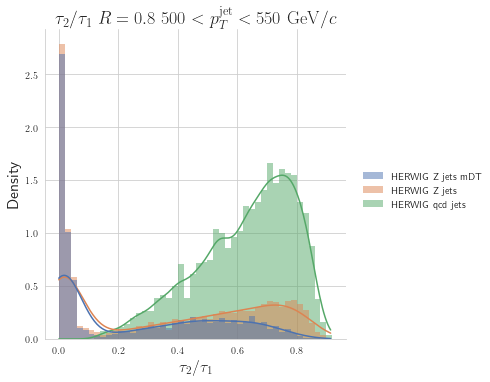

In [21]:
_p = sns.displot(data=dfall, x='tau21', hue='label', kind='hist',  kde=True, stat='density', binwidth=0.02, palette = 'deep')
plt.legend(prop={'size': 12}, title='')
_p._legend.set_title('')
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)


No handles with labels found to put in legend.


Text(25.29378285196689, 0.5, 'Density')

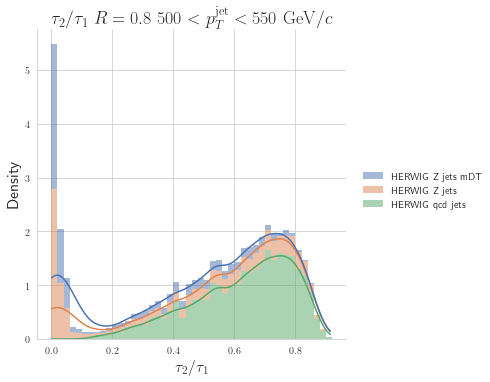

In [22]:
_p = sns.displot(data=dfall, x='tau21', hue='label', kind='hist',  kde=True, stat='density', binwidth=0.02, multiple="stack", palette = 'deep')
plt.legend(prop={'size': 12}, title='')
_p._legend.set_title('')
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)


No handles with labels found to put in legend.


Text(17.545039127262655, 0.5, 'Density')

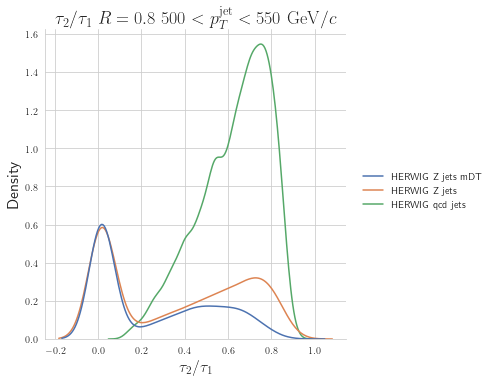

In [23]:
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
_p = sns.displot(data=dfall, x='tau21', hue='label', kind='kde', palette = 'deep')
plt.legend(prop={'size': 12}, title='')
_p._legend.set_title('')
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)


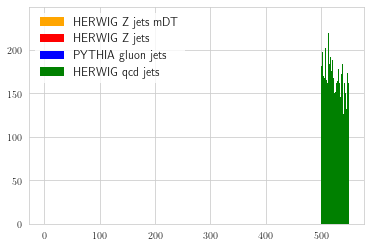

In [24]:
for i, ddf in enumerate(ddfs):
	df = ddf['df_filtered']
	hist = df['pt'].hist(color=ddf['color'], bins=50, label=ddf['label'])
plt.legend(prop={'size': 12})

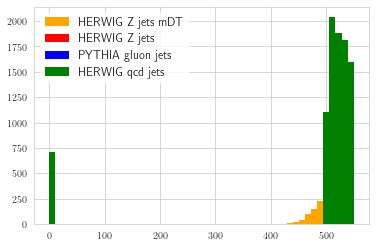

In [25]:
for i, ddf in enumerate(ddfs):
	df = ddf['df']
	hist = df['pt'].hist(color=ddf['color'], bins=50, label=ddf['label'])
plt.legend(prop={'size': 12})


/data/software/ploskon/heppy/venv/heppy-9eJ8HWuE/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/software/ploskon/heppy/venv/heppy-9eJ8HWuE/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/software/ploskon/heppy/venv/heppy-9eJ8HWuE/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

Text(0, 0.5, 'Density')

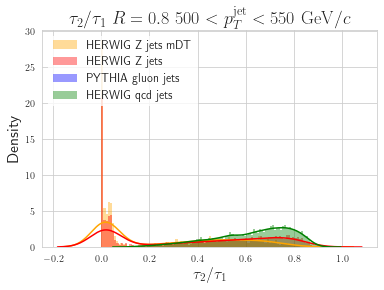

In [26]:
for i, ddf in enumerate(ddfs):
	df = ddf['df_filtered']
	sns.distplot(df['tau21'], kde=True, color=ddf['color'], bins=100, label=ddf['label'])
plt.legend(prop={'size': 12})
plt.title(r'$\tau_{2}/\tau_{1}$ $R=0.8$ $500 < p_{T}^{\mathrm{jet}} < 550$ $\mathrm{GeV}/c$', fontsize=18)
plt.xlabel(r'$\tau_{2}/\tau_{1}$', fontsize=16)
plt.ylabel('Density', fontsize=16)
